# Proyecto del móulo 2

# Variables del dataframe:

1. **listing_id**: Identificador único para cada anuncio en Airbnb.
2. **date**: Fecha específica para la disponibilidad del anuncio (puede contener múltiples fechas para un mismo anuncio).
3. **available**: Indicador de disponibilidad del anuncio para la fecha especificada (`'t'` para disponible, `'f'` para no disponible).
4. **maximum_nights**: Número máximo de noches que se puede reservar para el anuncio.
5. **name**: Nombre del anuncio, generalmente una descripción corta o destacada del alojamiento.
6. **host_id**: Identificador único del anfitrión que publica el anuncio.
7. **host_name**: Nombre del anfitrión.
8. **neighbourhood**: Barrio o área donde se encuentra el alojamiento.
9. **latitude**: Coordenada de latitud del alojamiento.
10. **longitude**: Coordenada de longitud del alojamiento.
11. **room_type**: Tipo de alojamiento ofrecido (`Entire home/apt`, `Private room`, `Shared room`, etc.).
12. **price**: Precio por noche del alojamiento.
13. **minimum_nights**: Número mínimo de noches requeridas para reservar el alojamiento.
14. **number_of_reviews**: Número total de reseñas que ha recibido el anuncio.
15. **last_review**: Fecha de la última reseña recibida.
16. **reviews_per_month**: Promedio de reseñas recibidas por mes.
17. **calculated_host_listings_count**: Número de anuncios activos del anfitrión.
18. **availability_365**: Número de días al año que el alojamiento está disponible para reserva.
19. **number_of_reviews_ltm**: Número de reseñas recibidas en los últimos 12 meses.
20. **license**: Código de licencia del alojamiento, si aplica (algunos anuncios pueden no tenerlo).

# ¿En qué barrio es mejor tener un AirBNB? ¿Qué tipo de AirBNB es más rentable?

## 0. Importamos los módulos que vamos a usar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import folium
import geopandas as gpd
import pandas as pd
from branca.colormap import LinearColormap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Importamos los datos.

In [2]:
data_1 = pd.read_csv('calendar.csv')
data_2 = pd.read_csv('listings.csv')
data_3 = pd.read_csv('listings_gz.csv', usecols=[61])

### 1.1 Observamos las tablas.

In [3]:
data_1.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,96033,2024-06-30,f,$59.00,NaN,3.0,1125.0
1,96033,2024-07-01,t,$59.00,NaN,3.0,1125.0
2,96033,2024-07-02,t,$59.00,NaN,3.0,1125.0
3,96033,2024-07-03,f,$59.00,NaN,3.0,1125.0
4,96033,2024-07-04,f,$59.00,NaN,3.0,1125.0


In [4]:
data_1.shape

(3276216, 7)

In [5]:
data_2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,96033,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,36.720310,-4.356270,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
1,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.720310,-4.361080,Private room,29.0,5,98,2024-06-24,0.63,5,147,9,NaN
2,330760,Malaga Lodge Guesthouse Double room-shared bath.,1687526,Mayte,NaN,Centro,36.729786,-4.413462,Private room,64.0,1,56,2024-06-16,0.37,6,104,6,VFT/MA/12240
3,340024,NEW APARTMENT IN MALAGA CENTER,1725690,Carlos,NaN,Centro,36.728130,-4.414220,Entire home/apt,69.0,3,276,2024-06-30,2.01,1,171,51,VFT/MA/02334
4,358541,Casa La Maga - Apartment for happy people,1526932,Cristina,NaN,Centro,36.723740,-4.421300,Entire home/apt,96.0,2,377,2024-06-08,2.54,1,125,27,VFT/MA/02288


In [6]:
data_2.shape

(8976, 18)

In [7]:
data_3.head()

,review_scores_rating
0,4.97
1,5.00
2,4.73
3,NaN
4,3.47


In [8]:
data_3.shape

(8976, 1)

Verificamos si id y listing_id poseen la misma información:

In [9]:
print(data_2['id'].unique()[:10])
print(data_1['listing_id'].unique()[:10])

[ 96033 166473 330760 340024 358541 413063 421077 427860 505688 507961]
[ 96033 166473 330760 340024 358541 413063 421077 427860 505688 507961]


In [28]:
all_match = data_1['listing_id'].isin(data_2['id']).all()
print("¿Todos los listing_id están en id?", all_match)

¿Todos los listing_id están en id? True


### 1.2 Unimos ambos datasets:

In [29]:
df = pd.merge(data_1, data_2, left_on='listing_id', right_on='id', how='inner')
df.head(), df.shape

(   listing_id        date available price_x  adjusted_price  minimum_nights_x  \
 0       96033  2024-06-30         f  $59.00             NaN               3.0   
 1       96033  2024-07-01         t  $59.00             NaN               3.0   
 2       96033  2024-07-02         t  $59.00             NaN               3.0   
 3       96033  2024-07-03         f  $59.00             NaN               3.0   
 4       96033  2024-07-04         f  $59.00             NaN               3.0   
 
    maximum_nights     id                                              name  \
 0          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 1          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 2          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 3          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 4          1125.0  96033  Bonito piso a 200m de la playa, El Palo (Málaga)   
 
    host_id  ...        room_t

Vemos las columnas que tiene:

In [30]:
df.columns

Index(['listing_id', 'date', 'available', 'price_x', 'adjusted_price',
       'minimum_nights_x', 'maximum_nights', 'id', 'name', 'host_id',
       'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price_y', 'minimum_nights_y',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

### 1.3 Eliminación de columnas redundantes:

In [31]:
df = df.drop(columns=['price_x', 'minimum_nights_x', 'id'])
df = df.rename(columns={'price_y': 'price', 'minimum_nights_y': 'minimum_nights'})
df.head()

,listing_id,date,available,adjusted_price,maximum_nights,name,host_id,host_name,neighbourhood_group,neighbourhood,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,96033,2024-06-30,f,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
1,96033,2024-07-01,t,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
2,96033,2024-07-02,t,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
3,96033,2024-07-03,f,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043
4,96033,2024-07-04,f,NaN,1125.0,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,...,Entire home/apt,70.0,3,225,2024-06-29,1.73,1,299,38,VFT/MA/22043


Ahora podemos trabajar con un solo dataset df que contiene toda la información relevante.

## 2. EDA

### 2.1 Resumen de información general del dataframe.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276216 entries, 0 to 3276215
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   listing_id                      int64  
 1   date                            object 
 2   available                       object 
 3   adjusted_price                  float64
 4   maximum_nights                  float64
 5   name                            object 
 6   host_id                         int64  
 7   host_name                       object 
 8   neighbourhood_group             float64
 9   neighbourhood                   object 
 10  latitude                        float64
 11  longitude                       float64
 12  room_type                       object 
 13  price                           float64
 14  minimum_nights                  int64  
 15  number_of_reviews               int64  
 16  last_review                     object 
 17  reviews_per_month          

### 2.2 Resumen estadístico de las variables numéricas.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,3276216.0,5.217126e+17,4.748659e+17,96033.000000,3.774492e+07,6.563914e+17,9.650379e+17,1.189767e+18
adjusted_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maximum_nights,3276214.0,6.872237e+02,4.520790e+02,1.000000,3.650000e+02,9.990000e+02,1.125000e+03,1.125000e+03
host_id,3276216.0,1.979669e+08,1.797581e+08,45553.000000,4.102521e+07,1.307236e+08,3.292660e+08,5.864050e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3276216.0,3.672025e+01,1.384591e-02,36.646012,3.671808e+01,3.672217e+01,3.672527e+01,3.687565e+01
longitude,3276216.0,-4.421389e+00,2.497524e-02,-4.584345,-4.429422e+00,-4.422600e+00,-4.417430e+00,-4.278520e+00
price,3133866.0,1.561449e+02,2.882533e+02,8.000000,8.900000e+01,1.190000e+02,1.660000e+02,1.209900e+04
minimum_nights,3276216.0,3.088809e+00,1.279437e+01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,6.990000e+02
number_of_reviews,3276216.0,4.293054e+01,7.372937e+01,0.000000,3.000000e+00,1.400000e+01,4.900000e+01,9.060000e+02


### 2.3 Estandarización de los datos.

In [34]:
# 1. Convertir todas las cadenas de texto a minúsculas
string_columns = df.select_dtypes(include='object').columns
for col in string_columns:
    df[col] = df[col].str.lower()

# 2. Convertir las columnas numéricas a tipo float (si no lo son ya)
numeric_columns = df.select_dtypes(exclude=['object', 'datetime']).columns
for col in numeric_columns:
    df[col] = df[col].astype(float)

# 3. Convertir las columnas de fechas a datetime
date_columns = ['last_review'] 
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce') 

print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276216 entries, 0 to 3276215
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   listing_id                      float64       
 1   date                            object        
 2   available                       object        
 3   adjusted_price                  float64       
 4   maximum_nights                  float64       
 5   name                            object        
 6   host_id                         float64       
 7   host_name                       object        
 8   neighbourhood_group             float64       
 9   neighbourhood                   object        
 10  latitude                        float64       
 11  longitude                       float64       
 12  room_type                       object        
 13  price                           float64       
 14  minimum_nights                  float64       
 15

### 2.4 Comprobar los valores nulos en el dataframe.

In [35]:
df.isnull().sum()

listing_id                              0
date                                    0
available                               0
adjusted_price                    3276216
maximum_nights                          2
name                                    0
host_id                                 0
host_name                               0
neighbourhood_group               3276216
neighbourhood                           0
latitude                                0
longitude                               0
room_type                               0
price                              142350
minimum_nights                          0
number_of_reviews                       0
last_review                        442745
reviews_per_month                  442745
calculated_host_listings_count          0
availability_365                        0
number_of_reviews_ltm                   0
license                             56576
dtype: int64

Neighbourhood_group y adjusted_price son columnas que no tienen valores, por lo que las eliminamos.

In [36]:
df.drop(columns=['neighbourhood_group', 'adjusted_price'], inplace=True)
print(df.columns)
print(df.shape)

Index(['listing_id', 'date', 'available', 'maximum_nights', 'name', 'host_id',
       'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
(3276216, 20)


Utilizamos un modelo de imputación por la media para intentar rellenar los valores nulos restantes, excepto los de license.

In [37]:
df['maximum_nights'].fillna(df['maximum_nights'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [38]:
df.isnull().sum()/df.shape[0]*100

listing_id                         0.000000
date                               0.000000
available                          0.000000
maximum_nights                     0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       13.513914
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                            1.726870
dtype: float64

Nuestro dataframe solo tiene valores nulos en 2 columnas, license, que serán útiles para un análisis posterior, y last_review.

### 2.5 Outliers

In [39]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
contar_outliers = {}
for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    contar_outliers[col] = len(outliers)

for col, cantidad in contar_outliers.items():
    print(f"Columna '{col}': {cantidad} outliers")


Columna 'listing_id': 0 outliers
Columna 'maximum_nights': 0 outliers
Columna 'host_id': 0 outliers
Columna 'latitude': 415005 outliers
Columna 'longitude': 562465 outliers
Columna 'price': 240170 outliers
Columna 'minimum_nights': 122275 outliers
Columna 'number_of_reviews': 339816 outliers
Columna 'reviews_per_month': 196736 outliers
Columna 'calculated_host_listings_count': 408042 outliers
Columna 'availability_365': 0 outliers
Columna 'number_of_reviews_ltm': 240536 outliers


Filtramos las coordenadas dentro del rango de Málaga.

In [40]:
df = df[(df['latitude'] >= 36.5) & (df['latitude'] <= 36.8)]
df = df[(df['longitude'] >= -4.6) & (df['longitude'] <= -4.3)]

### 2.6 Matriz de correlación.

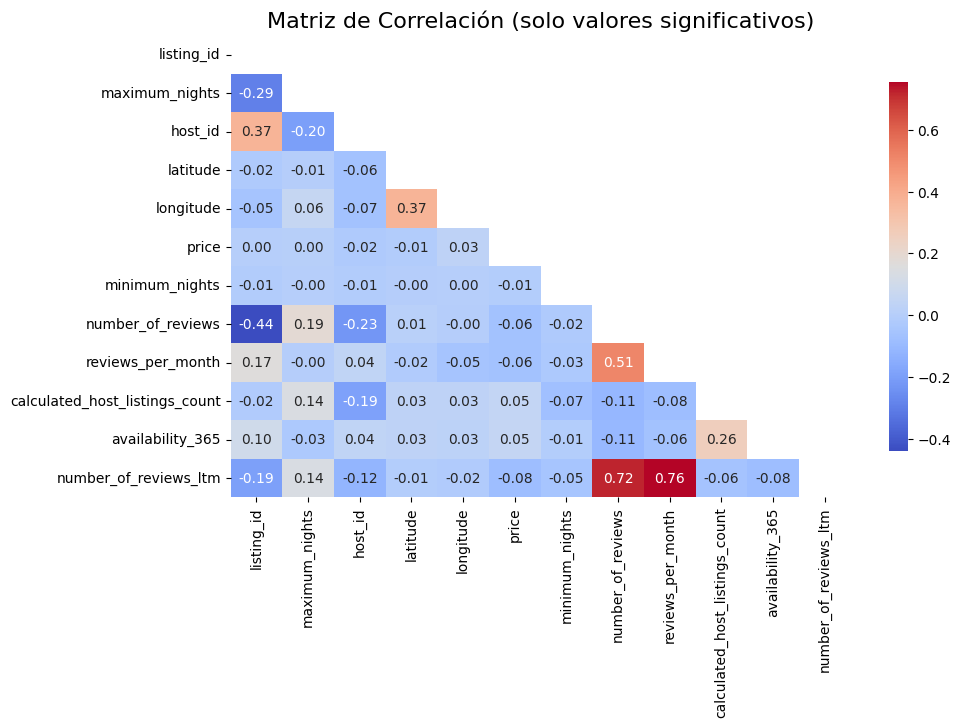

In [41]:
matriz_correlacion = df.select_dtypes(include='number').corr()
máscara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", mask=máscara, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación (solo valores significativos)', fontsize=16)
plt.show()

## 3. Análisis de precios y disponibilidad.

### 3.1 Precio promedio de los alojamientos en Málaga.

El precio promedio de los alojamientos en Málaga es: 156.05€


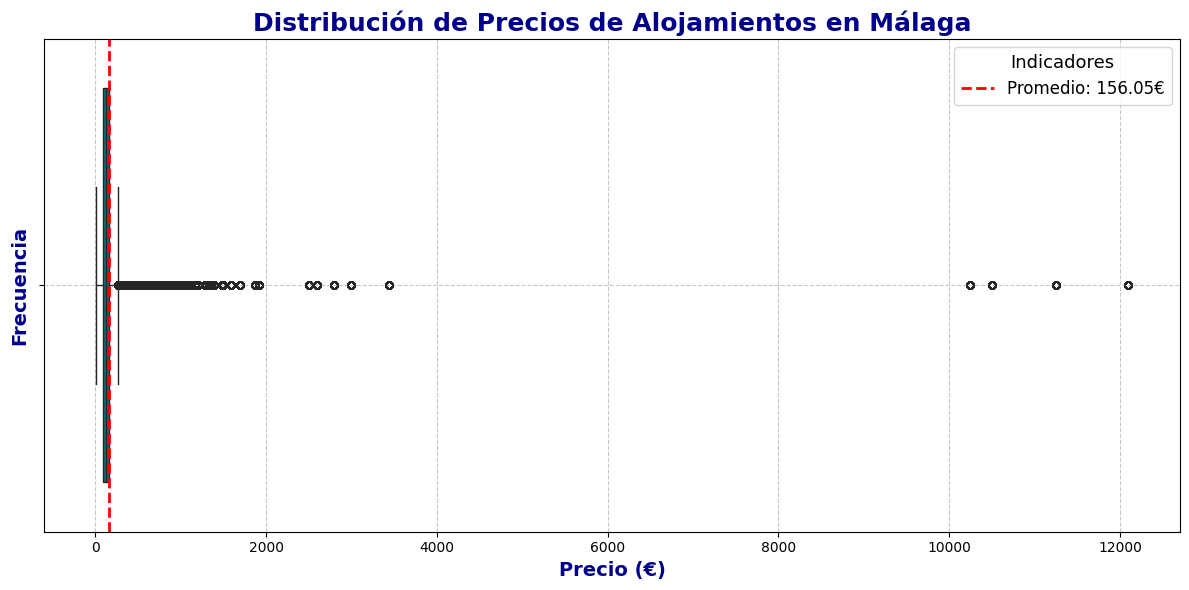

In [42]:
avg_price = df['price'].mean()
print(f"El precio promedio de los alojamientos en Málaga es: {avg_price:.2f}€")
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'], color='teal', fliersize=5)
plt.axvline(avg_price, color='red', linestyle='--', linewidth=2, label=f'Promedio: {avg_price:.2f}€')
plt.title('Distribución de Precios de Alojamientos en Málaga', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Precio (€)', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Frecuencia', fontsize=14, weight='bold', color='darkblue')
plt.legend(title='Indicadores', title_fontsize='13', loc='upper right', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Podemos observar que la mayoría de precios ronda los 156 euros. Establezcamos 4 categorías de precios: barato (0-80), medio (80-150), caro (150-300), muy caro (>300).

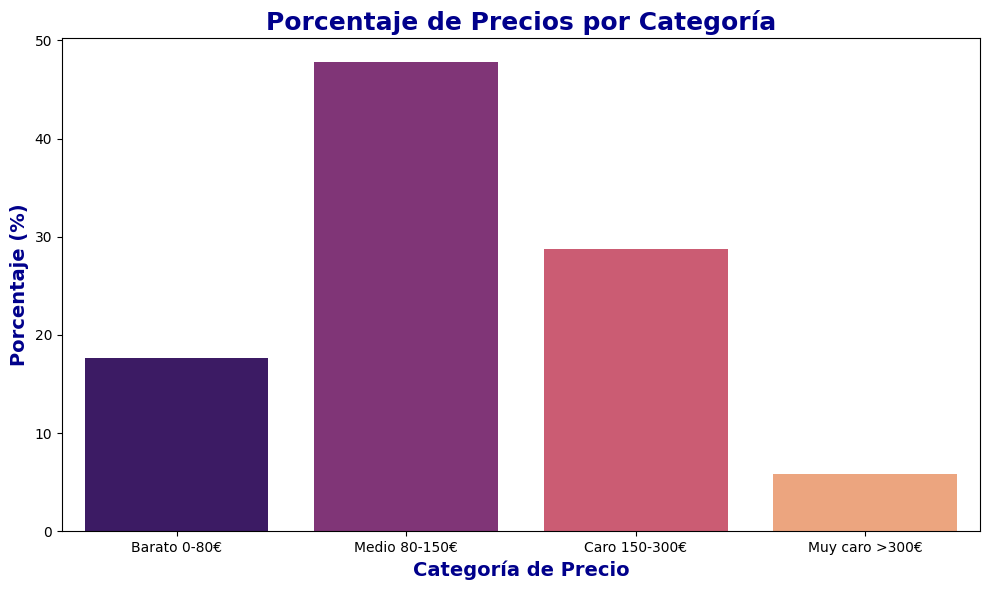

In [43]:
price_bins = [0, 80, 150, 300, np.inf] 
price_labels = ['Barato 0-80€', 'Medio 80-150€', 'Caro 150-300€', 'Muy caro >300€']  
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)
price_category_counts = df['price_category'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=price_category_counts.index, y=price_category_counts.values, palette='magma')
plt.title('Porcentaje de Precios por Categoría', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Categoría de Precio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Porcentaje (%)', fontsize=14, weight='bold', color='darkblue')
plt.tight_layout()
plt.show()

### 3.2 Comparación de precios por barrios.

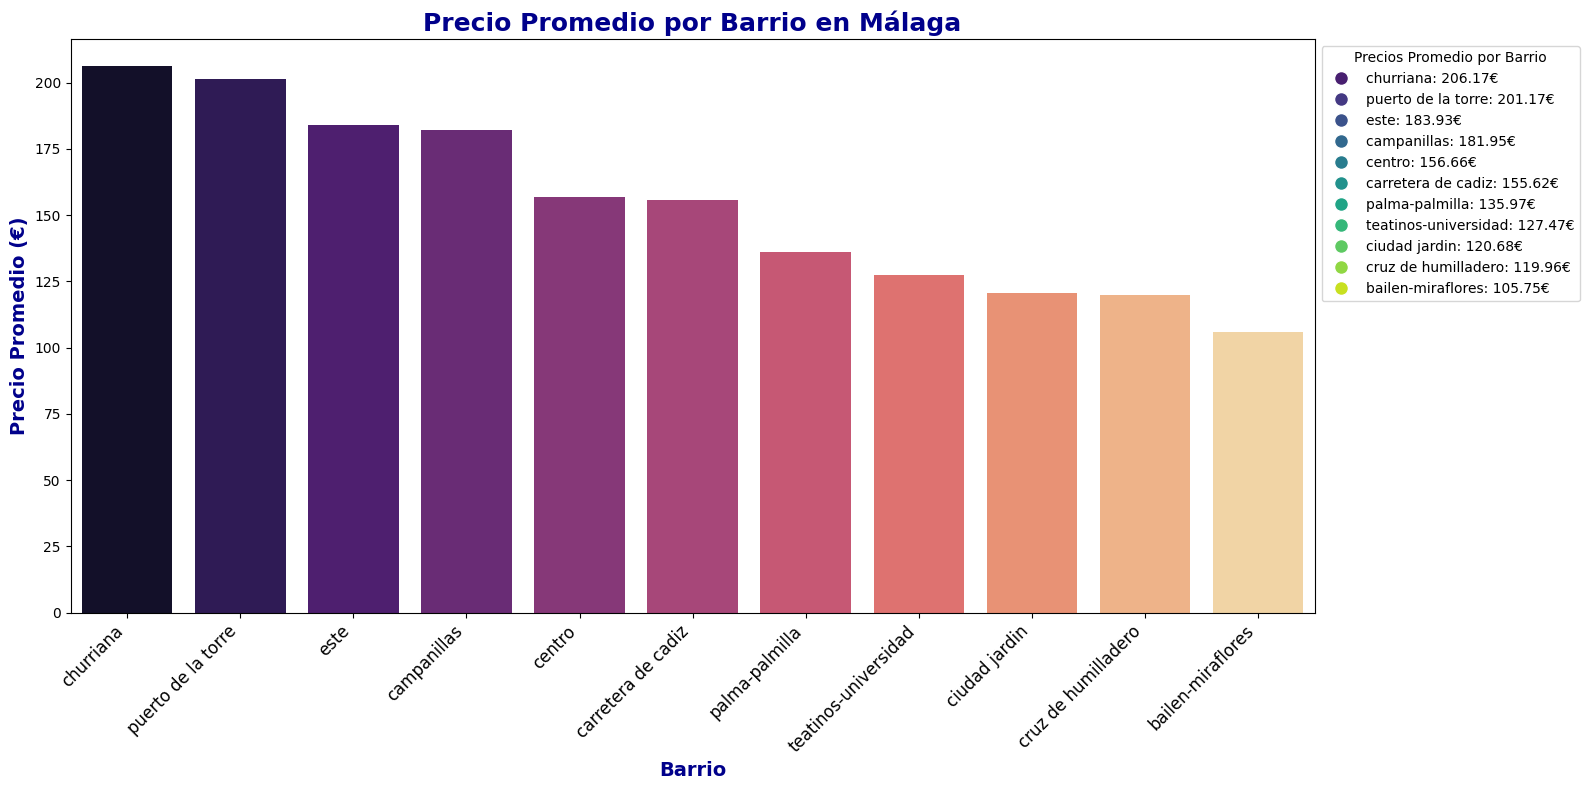

In [44]:
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values, palette='magma')
plt.title('Precio Promedio por Barrio en Málaga', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Barrio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Precio Promedio (€)', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, ha='right')
handles = []
labels = []
colors = sns.color_palette('viridis', len(avg_price_by_neighbourhood)) 

for i, (neighbourhood, avg_price) in enumerate(avg_price_by_neighbourhood.items()):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10))
    labels.append(f'{neighbourhood}: {avg_price:.2f}€')
plt.legend(handles=handles, labels=labels, title="Precios Promedio por Barrio", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Podemos observar un orden descendente donde el barrio con el mayor precio promedio es churiana, y el menor es bailen-miraflores.

### 3.3 Comparación de precios por tipo de alojamiento.

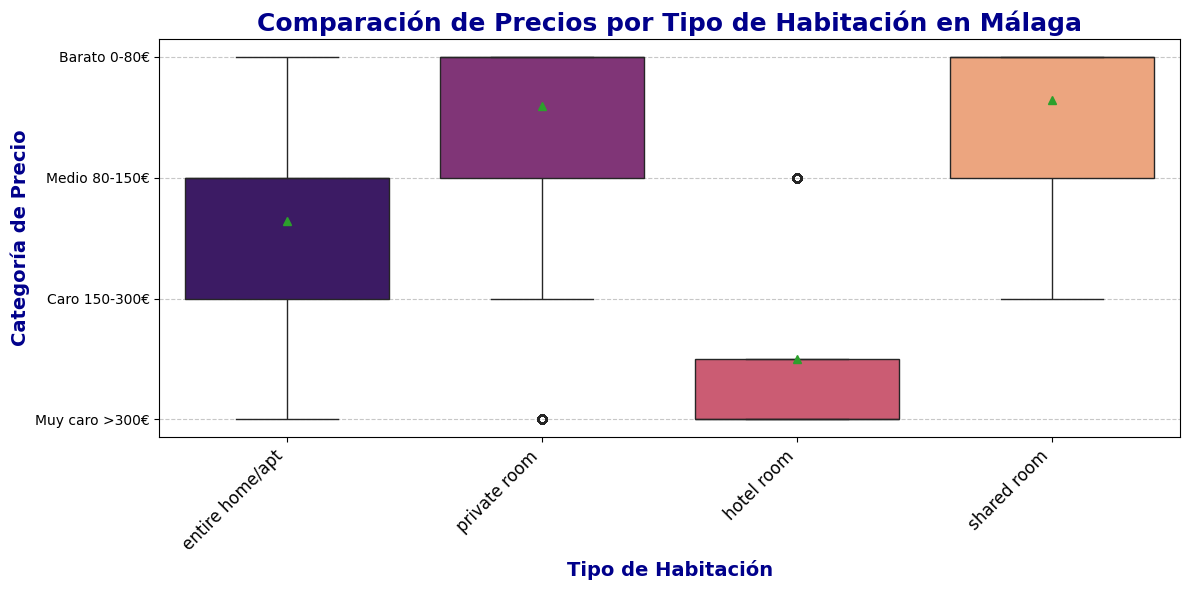

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='room_type', y='price_category', palette='magma', showmeans=True)
plt.title('Comparación de Precios por Tipo de Habitación en Málaga', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Tipo de Habitación', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Categoría de Precio', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.grid(True, linestyle='--', axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

### 3.4 Época del año con mayor o menor disponibilidad.

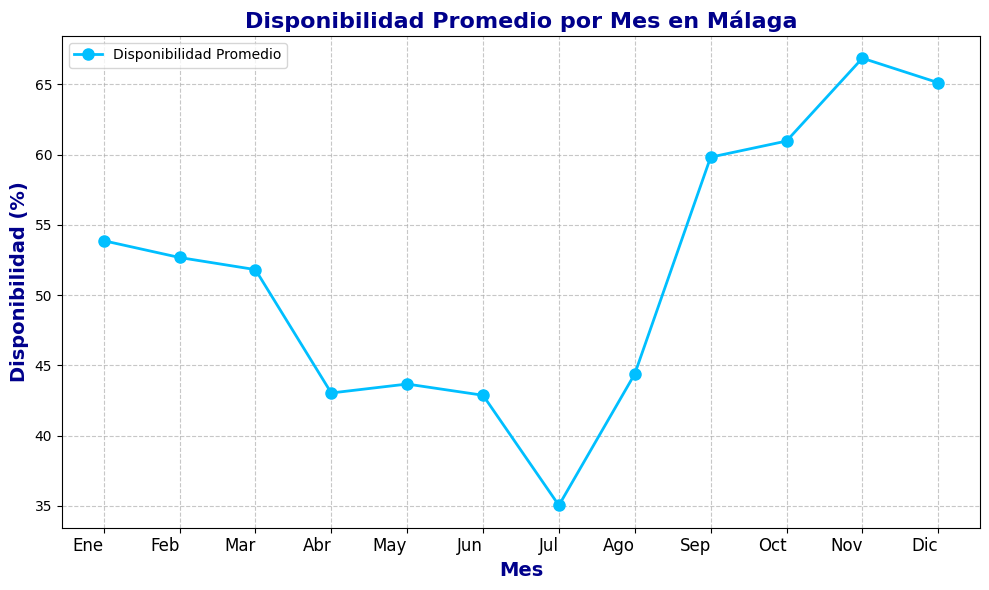

In [46]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
availability_by_month = df.groupby('month')['available'].apply(lambda x: (x == 't').mean() * 100)
plt.figure(figsize=(10, 6))
plt.plot(availability_by_month.index, availability_by_month.values, marker='o', color='deepskyblue', linestyle='-', linewidth=2, markersize=8, label='Disponibilidad Promedio')
plt.title('Disponibilidad Promedio por Mes en Málaga', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Mes', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Disponibilidad (%)', fontsize=14, weight='bold', color='darkblue')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], fontsize=12, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

El mes con menor disponibilidad es Julio.

### 3.5 Tendencias estacionales en reservas y precios.

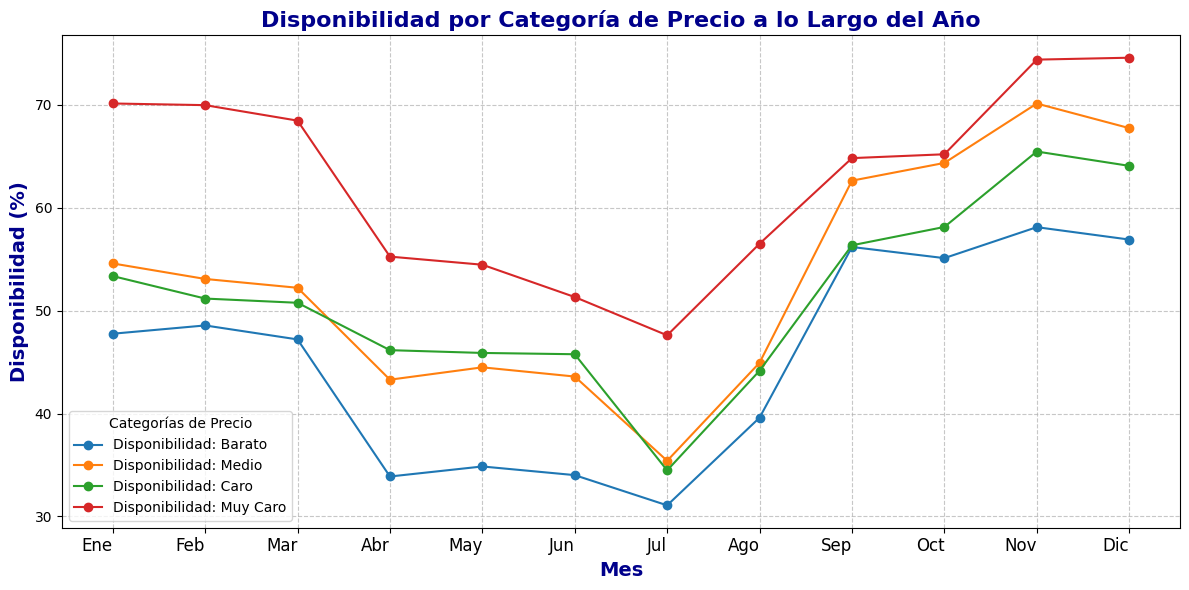

In [47]:
price_bins = [0, 80, 150, 300, np.inf] 
price_labels = ['Barato', 'Medio', 'Caro', 'Muy Caro']
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)
availability_by_month_price = df.groupby(['month', 'price_category'])['available'].apply(lambda x: (x == 't').mean() * 100).unstack()
plt.figure(figsize=(12, 6))

for category in price_labels:
    plt.plot(availability_by_month_price.index, availability_by_month_price[category], label=f'Disponibilidad: {category}', marker='o')

plt.title('Disponibilidad por Categoría de Precio a lo Largo del Año', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Mes', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Disponibilidad (%)', fontsize=14, weight='bold', color='darkblue')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], fontsize=12, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Categorías de Precio")
plt.tight_layout()
plt.show()

Como era de esperar, los pisos baratos son los que menos disponibilidad tienen a lo largo de todo el año, mientras que los caros son los que más disponibilidad tienen.

### 3.6 Factores que más afectan al precio.

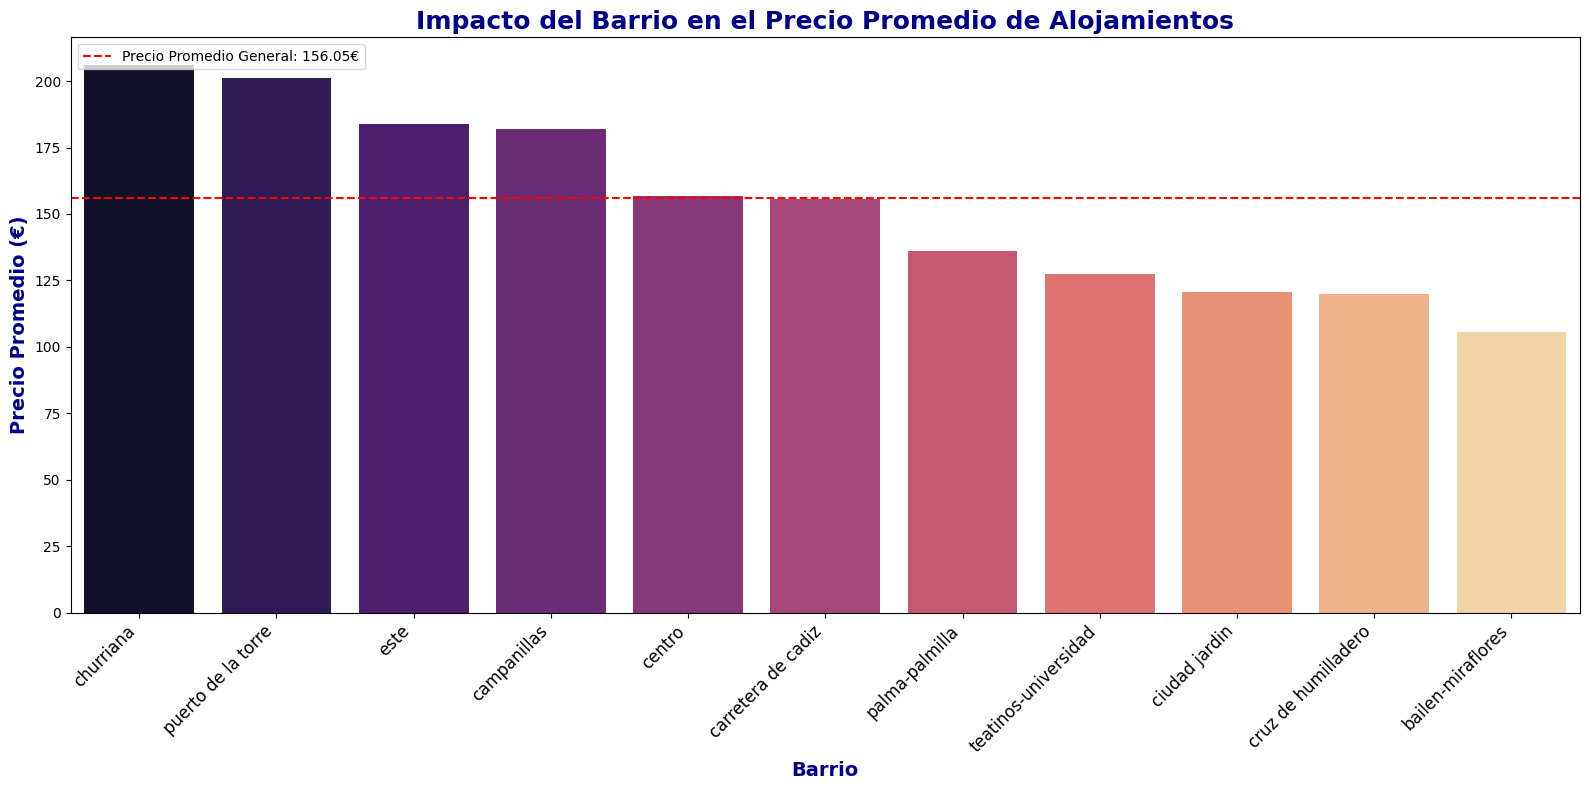

In [48]:
avg_price_by_neighbourhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values, palette='magma')
plt.title('Impacto del Barrio en el Precio Promedio de Alojamientos', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Barrio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Precio Promedio (€)', fontsize=14, weight='bold', color='darkblue')
avg_price = df['price'].mean()
plt.axhline(avg_price, color='red', linestyle='--', label=f'Precio Promedio General: {avg_price:.2f}€')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 3.7 Tipo de alojamiento.

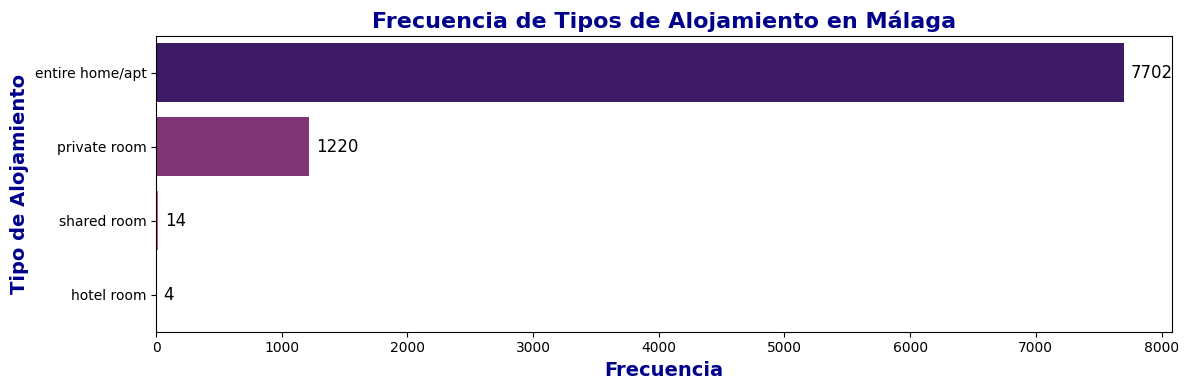

In [49]:
unique_listings = df.drop_duplicates(subset='listing_id')
room_type_count = unique_listings['room_type'].value_counts()
plt.figure(figsize=(12, 4))
ax = sns.barplot(x=room_type_count.values, y=room_type_count.index, palette='magma')
plt.title('Frecuencia de Tipos de Alojamiento en Málaga', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Frecuencia', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Tipo de Alojamiento', fontsize=14, weight='bold', color='darkblue')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

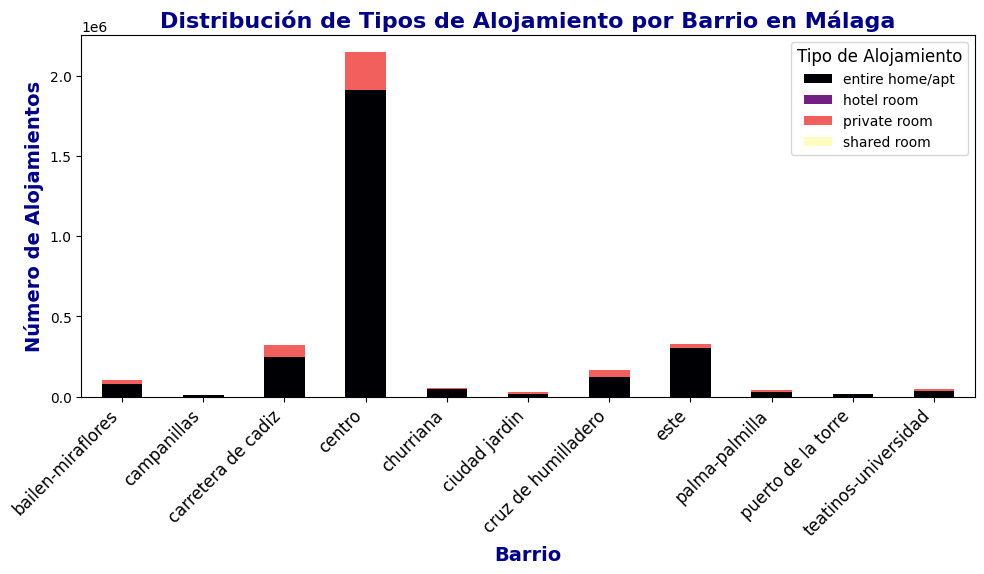

In [50]:
room_type_by_neighbourhood = df.groupby('neighbourhood')['room_type'].value_counts().unstack()
room_type_by_neighbourhood.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='magma')
plt.title('Distribución de Tipos de Alojamiento por Barrio en Málaga', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Barrio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Número de Alojamientos', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.legend(title='Tipo de Alojamiento', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

## 4. Condiciones legales.
---



### Normativa de Airbnb en Málaga:
1. **Registro obligatorio**:  
   Los alojamientos turísticos deben registrarse en el **Registro de Turismo de Andalucía (RTA)**. Cada propiedad obtiene un código identificativo (VFT, Vivienda con Fines Turísticos) que debe incluirse en los anuncios.

2. **Duración de alquiler**:  
   - Los alquileres a corto plazo están limitados a un máximo de **60 noches consecutivas** por persona.
   - No hay un límite anual de días, pero no se permite superar los **11 meses consecutivos** en contratos considerados de corto plazo.

3. **Impuestos**:  
   - Los anfitriones deben declarar los ingresos generados por el alquiler en el **IRPF** (Impuesto sobre la Renta de las Personas Físicas).
   - Pueden aplicarse impuestos turísticos adicionales en ciertos casos.

4. **Condiciones de la propiedad**:  
   - La vivienda debe cumplir con requisitos básicos de habitabilidad y seguridad, como disponer de aire acondicionado o calefacción según la temporada, extintores, y manuales de instrucciones para electrodomésticos.
   - Los anfitriones deben proporcionar información clara sobre la normativa de ruido.

5. **Multas por incumplimiento**:  
   Las sanciones por no cumplir con la normativa incluyen multas económicas importantes, que pueden variar dependiendo de la gravedad de la infracción.

6. **Prohibiciones en algunos barrios**:  
   En zonas donde el turismo de corta estancia afecta la disponibilidad de vivienda para residentes locales, los gobiernos locales pueden restringir la emisión de licencias.


### 4.1 Irregularidades en cuanto a la duración de la estancia.

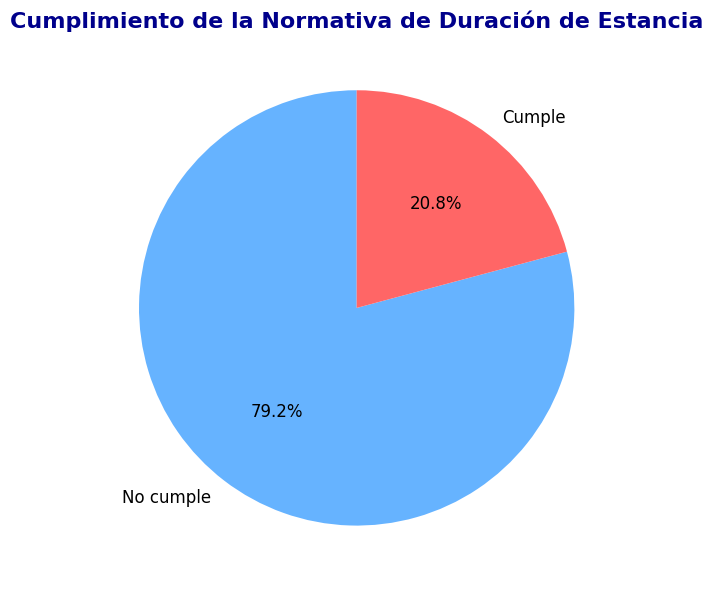

In [51]:
df_unique = df.drop_duplicates(subset=['listing_id']).copy()
df_unique.loc[:, 'duration_compliance'] = df_unique['maximum_nights'].apply(lambda x: 'Cumple' if x <= 330 else 'No cumple')
compliance_counts = df_unique['duration_compliance'].value_counts()
colors = ['#66b3ff', '#ff6666']
plt.figure(figsize=(8, 6))
plt.pie(compliance_counts, labels=compliance_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Cumplimiento de la Normativa de Duración de Estancia', fontsize=16, weight='bold', color='darkblue')
plt.tight_layout()

if 'duration_compliance' not in df.columns:
    df['duration_compliance'] = df['maximum_nights'].apply(lambda x: 'Cumple' if x <= 330 else 'No cumple')
plt.show()

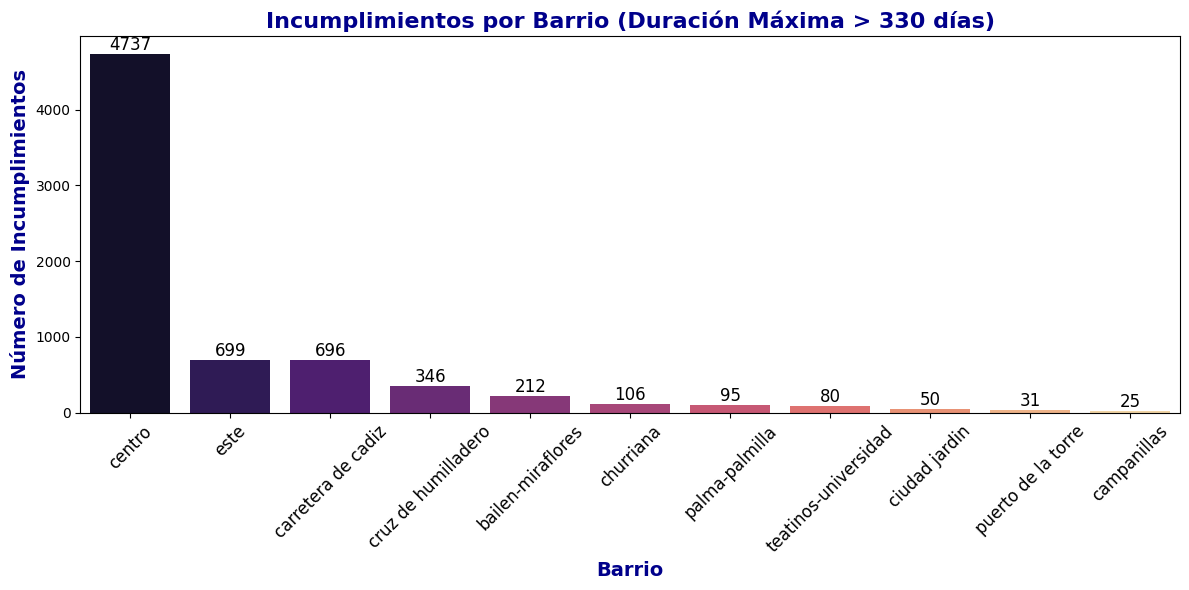

In [52]:
df_unique = df.drop_duplicates(subset=['listing_id'])
non_compliant_by_neighbourhood = df_unique[df_unique['duration_compliance'] == 'No cumple']['neighbourhood'].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=non_compliant_by_neighbourhood.index, y=non_compliant_by_neighbourhood.values, palette='magma')
plt.title('Incumplimientos por Barrio (Duración Máxima > 330 días)', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Barrio', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Número de Incumplimientos', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

### 4.2 Irregularidades en cuanto a la posesión de licencia.

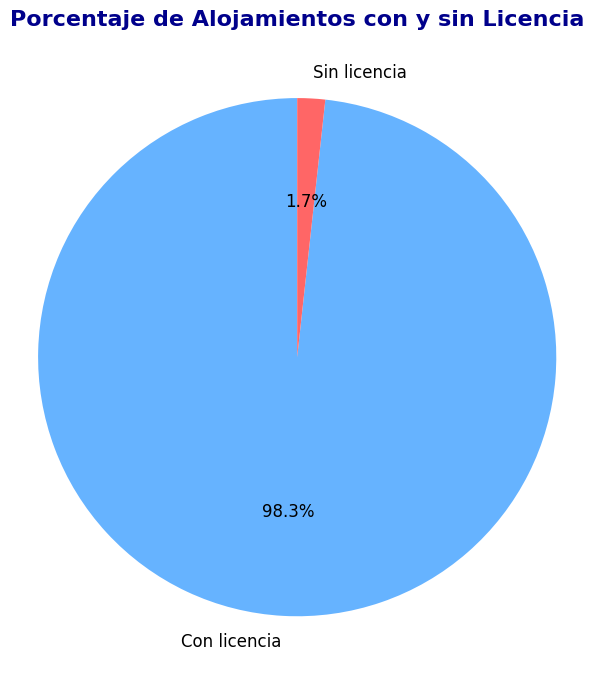

In [53]:
df_unique = df.drop_duplicates(subset=['listing_id']).copy() 
df_unique['has_license'] = df_unique['license'].notnull()
license_counts = df_unique['has_license'].value_counts()
plt.figure(figsize=(6, 7)) 
plt.pie(
    license_counts,
    labels=['Con licencia', 'Sin licencia'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff6666'],
    textprops={'fontsize': 12}
)
plt.title('Porcentaje de Alojamientos con y sin Licencia', fontsize=16, weight='bold', color='darkblue')
plt.axis('equal')  
plt.tight_layout()  
plt.show()

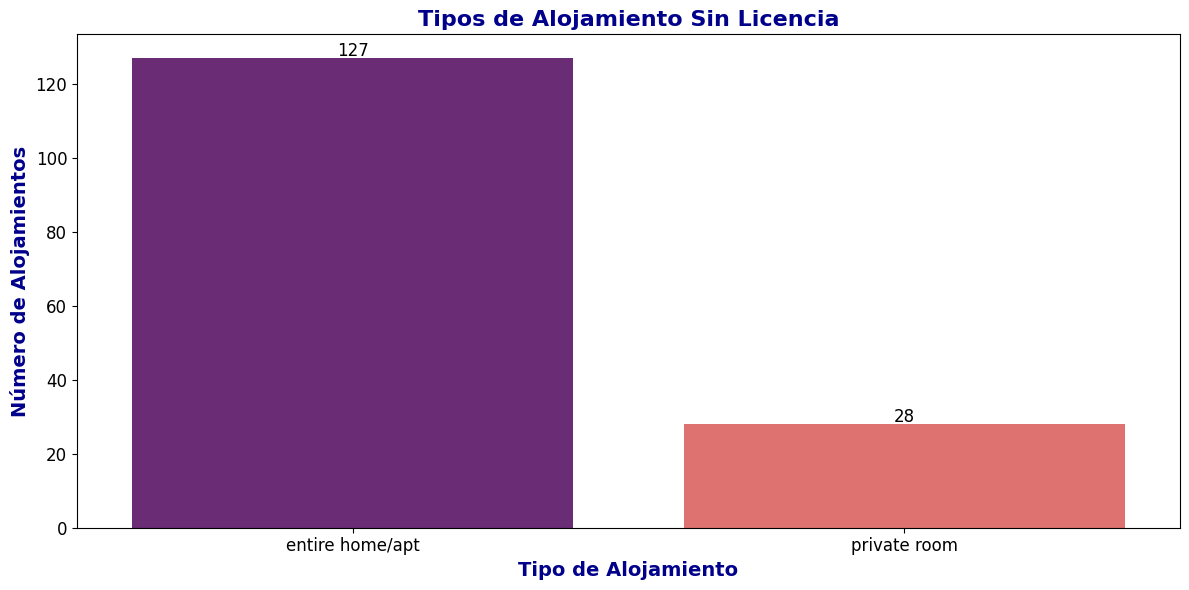

In [54]:
if 'has_license' not in df.columns:
    df['has_license'] = df['license'].notnull()
no_license_df = df.drop_duplicates(subset=['listing_id'])
no_license_df = no_license_df[no_license_df['has_license'] == False]
plt.figure(figsize=(12, 6))  
ax = sns.countplot(data=no_license_df, x='room_type', palette='magma', order=no_license_df['room_type'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Tipos de Alojamiento Sin Licencia', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Tipo de Alojamiento', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Número de Alojamientos', fontsize=14, weight='bold', color='darkblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Solo 2 tipos de alojamiento destacan por que algunos de los host no poseen licencia, habitación privada y apartamento. Aqui apartamento destaca notablemente sobre la habitación privada con 127 apartamentos sin licencia.

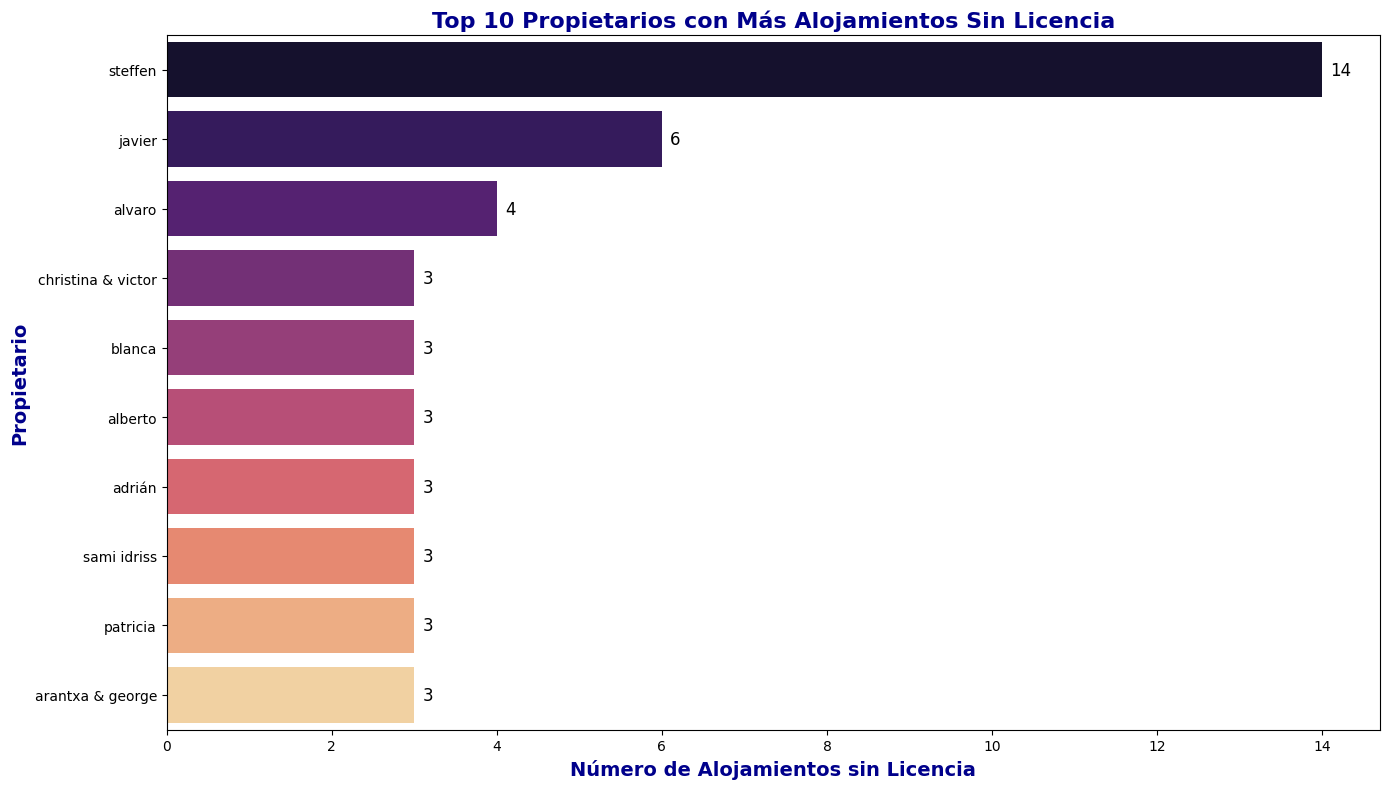

In [55]:
no_license_hosts = df[df['license'].isna() | (df['license'] == '')]
no_license_by_host = no_license_hosts.groupby('host_name')['listing_id'].nunique()
top_10_no_license_hosts = no_license_by_host.sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_no_license_hosts.values, y=top_10_no_license_hosts.index, palette='magma')
plt.title('Top 10 Propietarios con Más Alojamientos Sin Licencia', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Número de Alojamientos sin Licencia', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Propietario', fontsize=14, weight='bold', color='darkblue')

for i, value in enumerate(top_10_no_license_hosts.values):
    plt.text(value + 0.1, i, f'{value}', ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

Aqui podemos ver algunos ejemplos de propietarios y el número de alojamientos sin licencia que tienen.

## 5. Análisis de mercado.

### 5.1 ¿Cuáles son los barrios con más alojamientos listados?

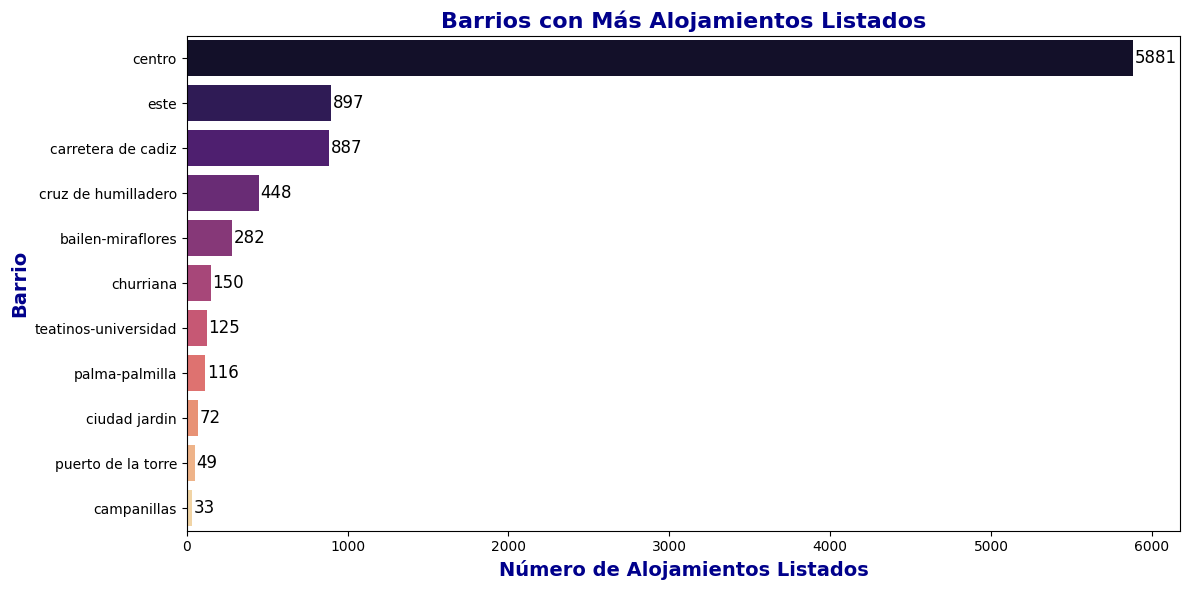

In [56]:
listings_by_neighbourhood = df.groupby('neighbourhood')['listing_id'].nunique()
listings_by_neighbourhood_sorted = listings_by_neighbourhood.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=listings_by_neighbourhood_sorted.values, y=listings_by_neighbourhood_sorted.index, palette='magma')
plt.title('Barrios con Más Alojamientos Listados', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Número de Alojamientos Listados', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Barrio', fontsize=14, weight='bold', color='darkblue')

for i, value in enumerate(listings_by_neighbourhood_sorted.values):
    plt.text(value + 10, i, f'{value}', ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

En el centro es donde más alojamientos encontramos con diferencia con 5881, frente a los 33 alojamientos de campanillas, zona con el menor número de alojamientos.

### 5.2 ¿Qué porcentaje de alojamientos pertenece a anfitriones que gestionan múltiples propiedades?


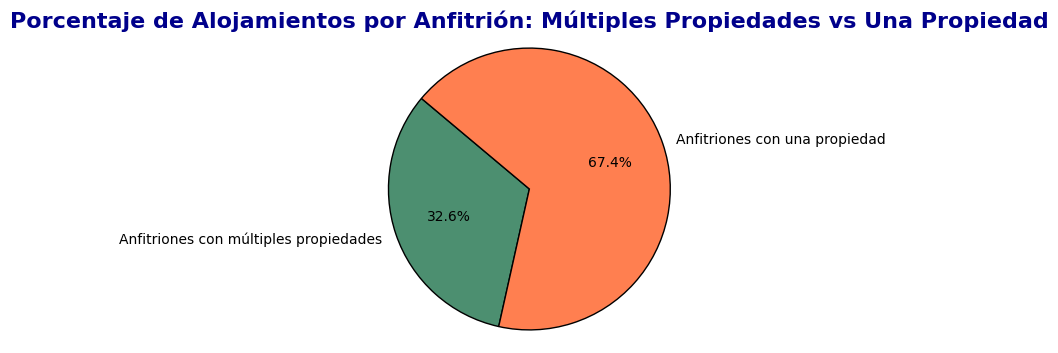

In [57]:
host_listings_count = df.groupby('host_id')['listing_id'].nunique()
multi_property_hosts = host_listings_count[host_listings_count > 1].count()
single_property_hosts = host_listings_count[host_listings_count == 1].count()
total_hosts = host_listings_count.count()
multi_property_percentage = (multi_property_hosts / total_hosts) * 100
single_property_percentage = (single_property_hosts / total_hosts) * 100
labels = ['Anfitriones con múltiples propiedades', 'Anfitriones con una propiedad']
sizes = [multi_property_percentage, single_property_percentage]
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4C8F70', '#FF7F50'], wedgeprops={'edgecolor': 'black'})
plt.title('Porcentaje de Alojamientos por Anfitrión: Múltiples Propiedades vs Una Propiedad', fontsize=16, weight='bold', color='darkblue')
plt.axis('equal') 
plt.show()

Observamos un 67.4% de propietarios con una sola propiedad, mientras que hay un 32.6% de propietarios con varias propiedades.

## 6. Perfil del cliente y del anfitrión.

### 6.1 ¿Cuáles son y dónde se encuentran los alojamientos con más reviews?

C:\Users\jorge\AppData\Local\Temp\ipykernel_22700\2645631293.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_reviews_df['listing_label'], rotation=30, ha='right')


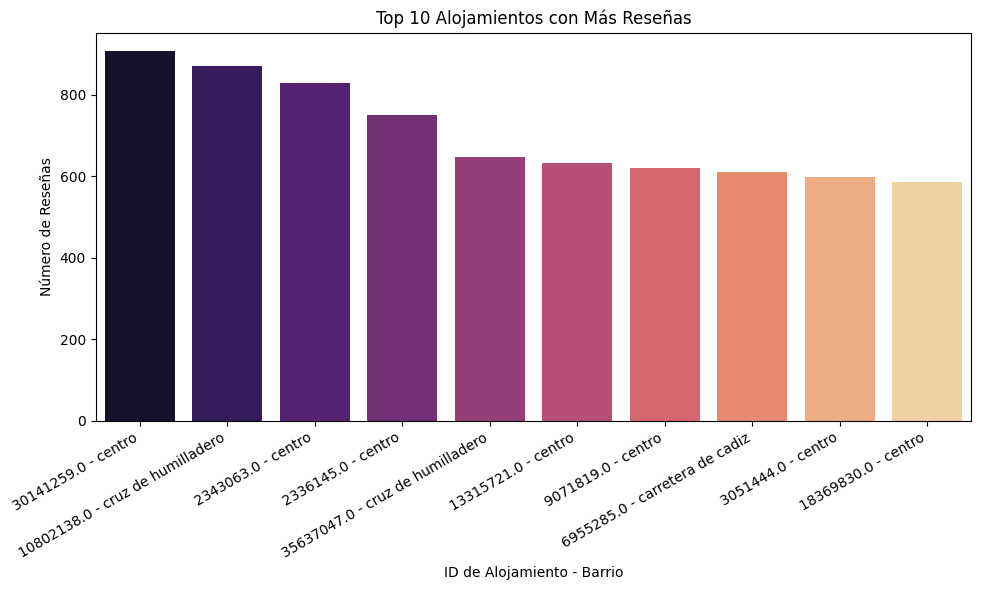

In [58]:
df_unique = df.drop_duplicates(subset=['listing_id'])
top_reviews = df_unique.nlargest(10, 'number_of_reviews')[['listing_id', 'neighbourhood', 'number_of_reviews']]
top_reviews_df = top_reviews.copy()
top_reviews_df['listing_label'] = top_reviews_df['listing_id'].astype(str) + " - " + top_reviews_df['neighbourhood']
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='listing_label', y='number_of_reviews', data=top_reviews_df, palette='magma')
plt.title("Top 10 Alojamientos con Más Reseñas")
plt.xlabel("ID de Alojamiento - Barrio")
plt.ylabel("Número de Reseñas")
ax.set_xticklabels(top_reviews_df['listing_label'], rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [59]:
top_reviews = df[['host_id', 'host_name', 'neighbourhood', 'price', 'number_of_reviews', "room_type"]].drop_duplicates()
top_reviews = top_reviews.sort_values(by='number_of_reviews', ascending=False).head(10)
top_reviews

,host_id,host_name,neighbourhood,price,number_of_reviews,room_type
625611,226466430.0,rafa&pilu,centro,88.0,906.0,entire home/apt
138700,47971136.0,christina,cruz de humilladero,38.0,871.0,private room
32120,11931754.0,frédéric c,centro,59.0,829.0,entire home/apt
31755,11931754.0,frédéric c,centro,69.0,749.0,entire home/apt
766136,268097476.0,lola,cruz de humilladero,27.0,646.0,private room
173010,15535210.0,carmen y muni,centro,96.0,632.0,entire home/apt
121910,47246887.0,encarnación,centro,24.0,621.0,private room
100375,36462988.0,sandra,carretera de cadiz,37.0,609.0,private room
40880,15535210.0,carmen y muni,centro,133.0,599.0,entire home/apt
296380,127195773.0,mónica y juan,centro,83.0,586.0,entire home/apt


En el centro es donde encontramos los alojamientos un un mayor número de reseñas. Esto no quiere decir que sean los mejores. También destacan los apartamentos completos y las habitaciones privadas como alojamientos con más reseñas.

### 6.2 ¿Qué tan frecuente es el cambio de precio en función de la disponibilidad?

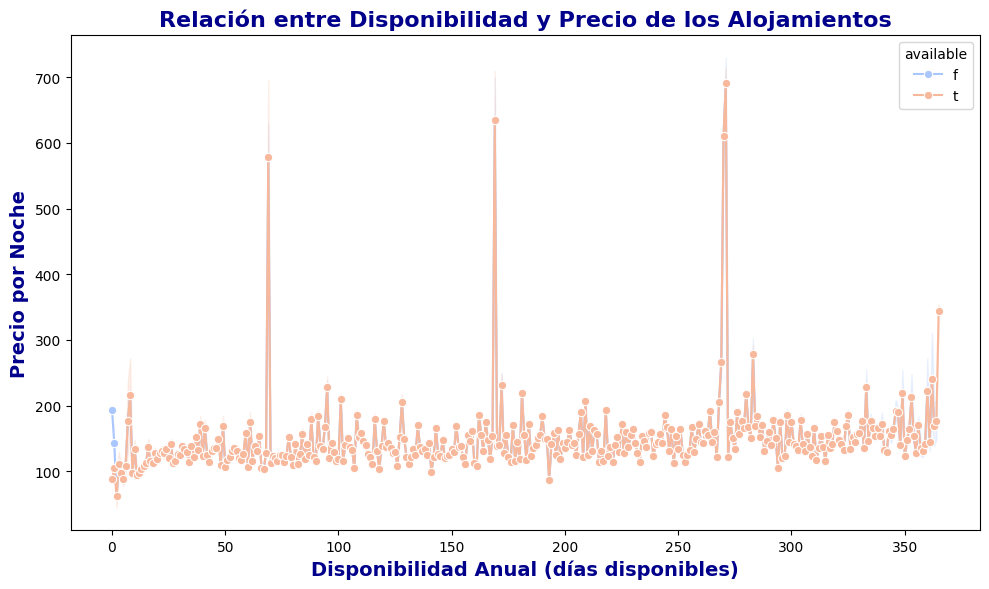

In [60]:
df['available'] = df['available'].astype('category')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='availability_365', y='price', hue='available', palette='coolwarm', marker='o')
plt.title('Relación entre Disponibilidad y Precio de los Alojamientos', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Disponibilidad Anual (días disponibles)', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Precio por Noche', fontsize=14, weight='bold', color='darkblue')
plt.tight_layout()
plt.show()

## 7. Rentabilidad.

### 7.1 ¿Qué barrio ofrece los alojamientos más rentables en términos de ocupación y precio?

In [61]:
df_unique = df.drop_duplicates(subset='listing_id')
df_unique['occupancy_rate'] = 1 - (df_unique['availability_365'] / 365)
neighbourhood_stats = df_unique.groupby('neighbourhood').agg(
    avg_price=('price', 'mean'),
    avg_occupancy=('occupancy_rate', 'mean'),
    total_listings=('listing_id', 'count')
).reset_index()
fig = px.scatter(
    neighbourhood_stats,
    x='avg_price',
    y='avg_occupancy',
    size='total_listings',
    color='neighbourhood',
    hover_name='neighbourhood',
    size_max=50,
    labels={
        'avg_price': 'Precio Promedio (€)',
        'avg_occupancy': 'Tasa de Ocupación Promedio',
        'total_listings': 'Total de Alojamientos'
    },
    title='Rentabilidad por Barrio en Términos de Ocupación y Precio',
)
fig.update_layout(
    xaxis=dict(title='Precio Promedio (€)'),
    yaxis=dict(title='Tasa de Ocupación Promedio'),
    title_font=dict(size=16, family='Arial', color='darkblue'),
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_22700\2176448740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['occupancy_rate'] = 1 - (df_unique['availability_365'] / 365)


In [62]:
neighbourhood_stats['annual_revenue'] = neighbourhood_stats['avg_price'] * neighbourhood_stats['avg_occupancy'] * 365
fig = px.scatter(
    neighbourhood_stats,
    x='avg_price',
    y='avg_occupancy',
    size='annual_revenue',
    color='neighbourhood',
    hover_name='neighbourhood',
    size_max=60,
    labels={
        'avg_price': 'Precio Promedio (€)',
        'avg_occupancy': 'Tasa de Ocupación Promedio',
        'annual_revenue': 'Ingresos Anuales Estimados (€)'
    },
    title='Rentabilidad por Barrio en Términos de Ocupación, Precio e Ingresos',
)
fig.update_layout(
    xaxis=dict(title='Precio Promedio (€)'),
    yaxis=dict(title='Tasa de Ocupación Promedio'),
    title_font=dict(size=16, family='Arial', color='darkblue'),
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.show()

C:\Users\jorge\AppData\Local\Temp\ipykernel_22700\1587035795.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



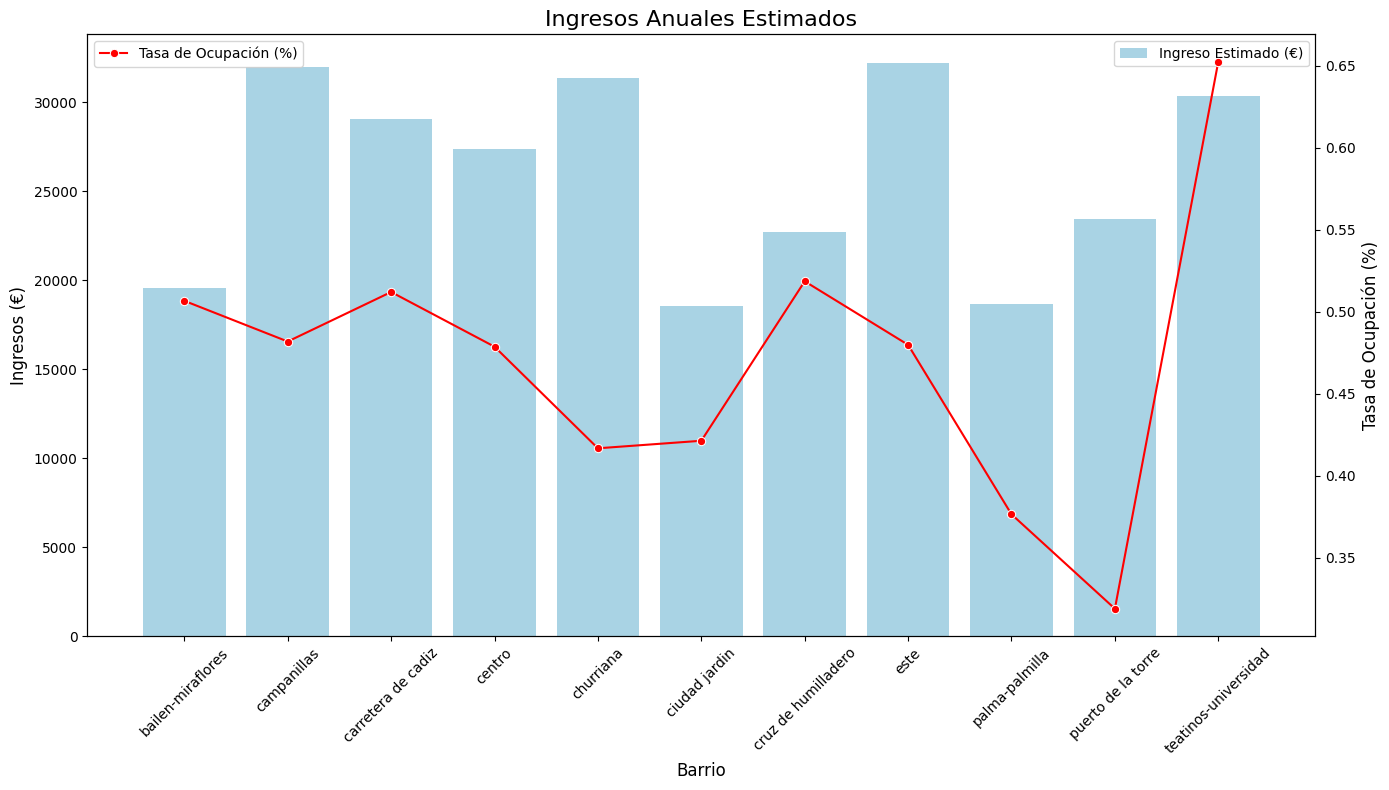

In [63]:
neighbourhood_data = neighbourhood_stats
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(
    x='neighbourhood',
    y='annual_revenue',
    data=neighbourhood_data,
    color='skyblue',
    alpha=0.8,
    label='Ingreso Estimado (€)',
    ax=ax
)
ax.set_title('Ingresos Anuales Estimados', fontsize=16)
ax.set_xlabel('Barrio', fontsize=12)
ax.set_ylabel('Ingresos (€)', fontsize=12)
ax2 = ax.twinx()
sns.lineplot(
    x='neighbourhood',
    y='avg_occupancy',
    data=neighbourhood_data,
    color='red',
    marker='o',
    label='Tasa de Ocupación (%)',
    ax=ax2
)
ax2.set_ylabel('Tasa de Ocupación (%)', fontsize=12)
ax2.legend(loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Mapa de Málaga por barrio con el precio promedio.

In [64]:
new_df = pd.read_csv('listings.csv')
avg_price_by_neighbourhood = new_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
malaga_map = gpd.read_file("neighbourhoods.geojson")
avg_price_df = pd.DataFrame([avg_price_by_neighbourhood])
avg_price_df = avg_price_df.transpose().reset_index()
avg_price_df.columns = ['neighbourhood', 'price']
malaga_map = pd.merge(malaga_map, avg_price_df, on='neighbourhood', how='left')
malaga_map.rename(columns={'price': 'average_price'}, inplace=True)
malaga_map.average_price = malaga_map.average_price.round(decimals=0)
malaga_map = malaga_map.dropna(subset=['average_price'])
map_dict = malaga_map.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow', 'red', 'purple'], vmin=min(map_dict.values()), vmax=max(map_dict.values()), caption='Precio Promedio')
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    if value is None:
        return '#BADADA'
    else:
        return color_scale(value)
map_malaga = folium.Map(location=[36.7213, -4.4217], zoom_start=12)
folium.GeoJson(data=malaga_map,
               name='Málaga',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function=lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity': 0.9},
               highlight_function=lambda feature: {'weight': 3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map_malaga)
map_malaga.add_child(color_scale)
map_malaga

In [65]:
map_malaga.save('map_malaga.html')

### 7.2 Relación entre el número de reseñas y el precio promedio por barrio.

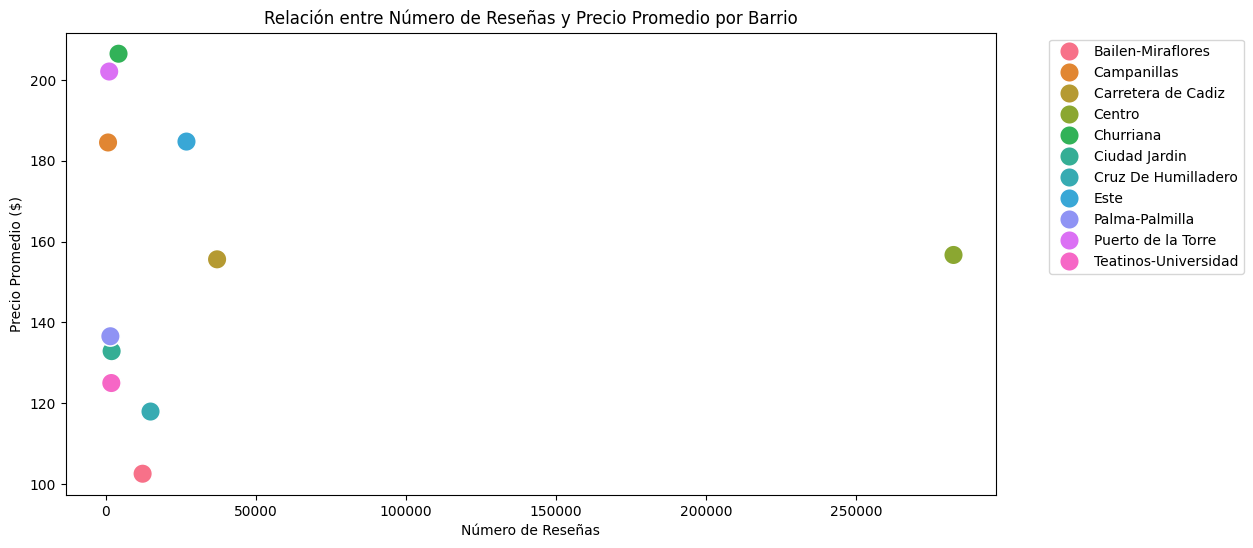

In [69]:
barrio_stats = data_2.groupby('neighbourhood').agg({
    'price': 'mean',
    'number_of_reviews': 'sum'
}).reset_index()

barrio_stats.columns = ['Barrio', 'Precio Promedio', 'Número de Reseñas']
plt.figure(figsize=(12, 6))
sns.scatterplot(data=barrio_stats, x='Número de Reseñas', y='Precio Promedio', hue='Barrio', s=200)
plt.title('Relación entre Número de Reseñas y Precio Promedio por Barrio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio Promedio ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 7.3 Análisis de ocupación promedio por tipo de habitación.

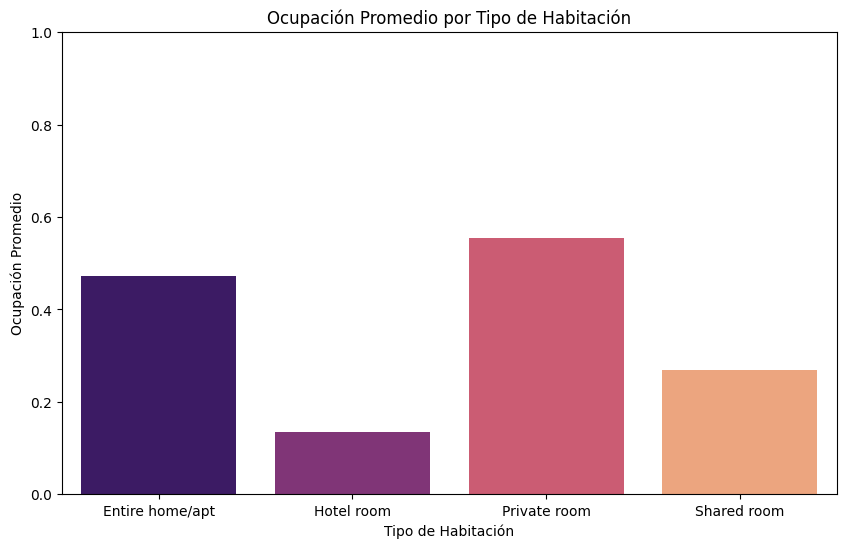

In [72]:
data_1['occupied'] = data_1['available'].apply(lambda x: 0 if x == 't' else 1)
merged_data = pd.merge(data_1, data_2, left_on='listing_id', right_on='id')
room_type_occupancy = merged_data.groupby('room_type')['occupied'].mean().reset_index()
room_type_occupancy.columns = ['Tipo de Habitación', 'Ocupación Promedio']
plt.figure(figsize=(10, 6))
sns.barplot(data=room_type_occupancy, x='Tipo de Habitación', y='Ocupación Promedio', palette='magma')
plt.title('Ocupación Promedio por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Ocupación Promedio')
plt.ylim(0, 1)
plt.show()

### 7.4 Ingresos estimados anuales por tipo de alojamiento.

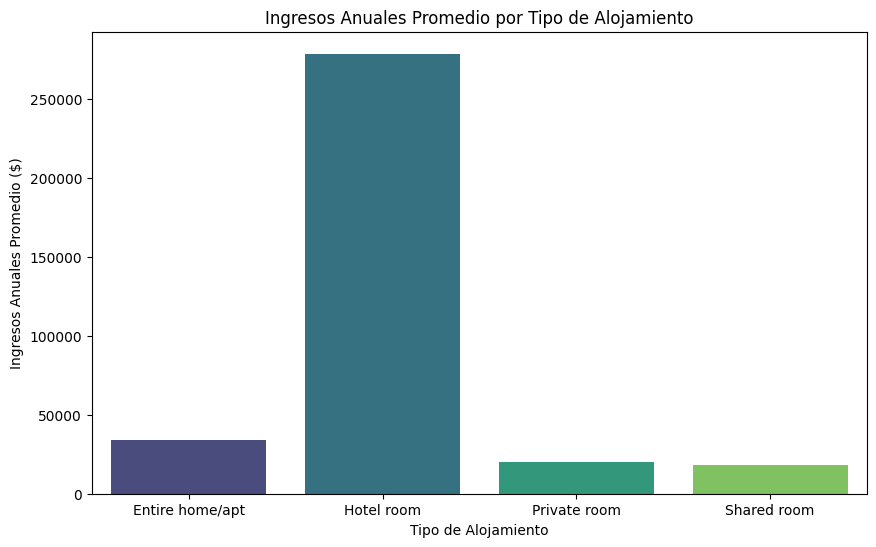

In [74]:
data_2['estimated_annual_income'] = data_2['price'] * data_2['availability_365']
annual_income_by_room_type = data_2.groupby('room_type')['estimated_annual_income'].mean().reset_index()
annual_income_by_room_type.columns = ['Tipo de Alojamiento', 'Ingresos Anuales Promedio']
plt.figure(figsize=(10, 6))
sns.barplot(data=annual_income_by_room_type, x='Tipo de Alojamiento', y='Ingresos Anuales Promedio', palette='viridis')
plt.title('Ingresos Anuales Promedio por Tipo de Alojamiento')
plt.xlabel('Tipo de Alojamiento')
plt.ylabel('Ingresos Anuales Promedio ($)')
plt.show()

# Código para hacer un mapa de la zona con el average price.

feq = listings[listings['accommodates']==8]
feq = listings[listings['neighbourhood_group'] == 'Kauai']
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color=['#454545', '#6d5959', '#9dcbba', '#f3de8a', '#eb9486', '#7e7f9a', '#8377d1', '#a53860'],edgecolor = 'black', width=1)
plt.title("Precio medio diario para 8 personas en Kauai", fontsize=20)
plt.xlabel('Precio medio ($)', fontsize=12)
plt.ylabel("")
plt.show();

feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
adam = gpd.read_file("/Users/pedrollamaslopez/Desktop/Curso_upgrade/Módulo_2/16-Data StoryTelling/Hawaii/data/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()

adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)
adam = adam.dropna(subset=['average_price'])

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red','purple'], vmin=min(map_dict.values()), vmax=max(map_dict.values()), caption='Average price')
def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    if value is None:
        return '#BADADA'
    else:
        return color_scale(value)
    
map3 = folium.Map(location=[22.073414994647898, -159.5257299787407], zoom_start=10)
folium.GeoJson(data=adam,
               name='Hawaii',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.9 },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3.add_child(color_scale)

# Este no sé para qué es pero es útil.

import nltk
nltk.download('stopwords')
#take out empty comments (530)
reviews_details = reviews_details[reviews_details['comments'].notnull()]

#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split()
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Probar a hacer algo en streamlit